In [1]:
import pandas as pd

# Load the dataset for parcel pickup
pickup_sh = pd.read_csv('LaDE-P\\pickup_sh.csv')
pickup_sh['city'] = 'Shanghai'

pickup_cq = pd.read_csv('LaDE-P\\pickup_cq.csv')
pickup_cq['city'] = 'Chongqing'

pickup_hz = pd.read_csv('LaDE-P\\pickup_hz.csv')
pickup_hz['city'] = 'Hangzhou'

pickup_jl = pd.read_csv('LaDE-P\\pickup_jl.csv')
pickup_jl['city'] = 'Jilin'

pickup_yt = pd.read_csv('LaDE-P\\pickup_yt.csv')
pickup_yt['city'] = 'Yantai'

pickup = pd.concat([pickup_sh, pickup_cq, pickup_hz, pickup_jl, pickup_yt], ignore_index=True)

# Get basic information about the dataset
data_info = pickup.info()

# Display the first few rows of the dataset
data_head = pickup.head()

data_info, data_head
#del data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136147 entries, 0 to 6136146
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   region_id          int64  
 2   city               object 
 3   courier_id         int64  
 4   accept_time        object 
 5   time_window_start  object 
 6   time_window_end    object 
 7   lng                float64
 8   lat                float64
 9   aoi_id             int64  
 10  aoi_type           int64  
 11  pickup_time        object 
 12  pickup_gps_time    object 
 13  pickup_gps_lng     float64
 14  pickup_gps_lat     float64
 15  accept_gps_time    object 
 16  accept_gps_lng     float64
 17  accept_gps_lat     float64
 18  ds                 int64  
dtypes: float64(6), int64(6), object(7)
memory usage: 889.5+ MB


Data Overview for Parcel Pickup in 5 cities:

The dataset consists of 6136147  entries with 17 columns. Here's a breakdown of the columns:

order_id: ID associated with each order.

region_id: ID of the region where the pickup is taking place.

city: The city where the pickup is taking place.

courier_id: ID of the courier responsible for the pickup.

lng & lat: Longitude and latitude of the pickup point.

aoi_id: Area of interest ID.

aoi_type: Type of area of interest. for example, school, office, home etc

accept_time: Time when the pickup was accepted.

accept_gps_time: GPS timestamp when the pickup was accepted.

accept_gps_lng & accept_gps_lat: Longitude and latitude where the pickup was accepted.

pickup_time: Time when the pickup was made.

pickup_gps_time: GPS timestamp when the pickup was made.

pickup_gps_lng & pickup_gps_lat: Longitude and latitude where the pickup was made.

ds: Appears to be a date stamp, but needs further investigation.

The dataset has no missing values, which is a good sign for the analysis.


Next Steps:
Descriptive Statistics: Get a summary of the numerical columns in the dataset.
Visualization: Explore data distributions, relationships, and patterns using various plots.

In [12]:
# city and size Shanghai 1424406
# city and size Chongqing 1172703
# city and size Hangzhou 2130456
# city and size Jilin 261801
# city and size Yantai 1146781
print(pickup_sh.shape)
print(pickup_cq.shape)
print(pickup_hz.shape)
print(pickup_jl.shape)
print(pickup_yt.shape)


(1424406, 19)
(1172703, 19)
(2130456, 19)
(261801, 19)
(1146781, 19)


In [3]:
# Compute descriptive statistics for numerical columns
desc_stats = pickup.describe()

print(desc_stats)
del desc_stats


           order_id     region_id    courier_id           lng           lat  \
count  6.136147e+06  6.136147e+06  6.136147e+06  6.136147e+06  6.136147e+06   
mean   3.090931e+06  6.452570e+01  7.889059e+03  1.183564e+02  3.230873e+01   
std    1.775744e+06  3.791702e+01  4.565536e+03  5.720413e+00  3.680536e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.053727e+02  2.810210e+01   
25%    1.559888e+06  3.300000e+01  4.046000e+03  1.199455e+02  3.019368e+01   
50%    3.093924e+06  6.600000e+01  7.878000e+03  1.202768e+02  3.043618e+01   
75%    4.627960e+06  9.500000e+01  1.175800e+04  1.213778e+02  3.135063e+01   
max    6.161997e+06  1.340000e+02  1.606600e+04  1.303666e+02  4.442747e+01   

             aoi_id      aoi_type  pickup_gps_lng  pickup_gps_lat  \
count  6.136147e+06  6.136147e+06    4.343285e+06    4.343285e+06   
mean   1.215777e+04  5.043091e+00    1.183813e+02    3.257753e+01   
std    7.131654e+03  5.848862e+00    5.792829e+00    3.865521e+00   
min    0.000

In [4]:
6.161997e+06

6161997.0

In [11]:
1.031000e+03

1031.0

Descriptive Statistics for Parcel pickup in Shanghai:

order_id: Ranges from 0 to 6161997. This indicates the unique ID associated with each order.

region_id: Ranges from 1 to 134. This suggests that there are 160 different regions within Shanghai where pickup are made.

courier_id: Ranges from 0 to 16066, indicating that there are 16066 couriers available for pickup in 5 cities.

lng & lat: These represent the longitude and latitude of the pickup points. Their ranges show the geographical spread of pickup points within Shanghai.

aoi_id: Ranges from 1 to 24543, suggesting that there are 24543 different areas of interest.

aoi_type: Ranges from 0 to 14, indicating that there are 15 different types of areas of interest.

accept_gps_lng & accept_gps_lat: These columns provide information about the location where the pickup was accepted.

pickup_gps_lng & pickup_gps_lat: These columns provide information about the location where the pickup was made.

ds: Appears to be a date stamp or some form of categorical representation, ranging from 501 to 1,031. This needs further exploration to understand its significance.

Visualization:

Distribution of pickup points in Shanghai using scatter plots.

Distribution of pickup times using histograms or bar plots.

Distribution of regions using bar plots.

Correlation heatmap to understand the relationships between numerical columns.

Let's start by visualizing the distribution of pickup points in Shanghai using scatter plots to get a geographical understanding of the data.

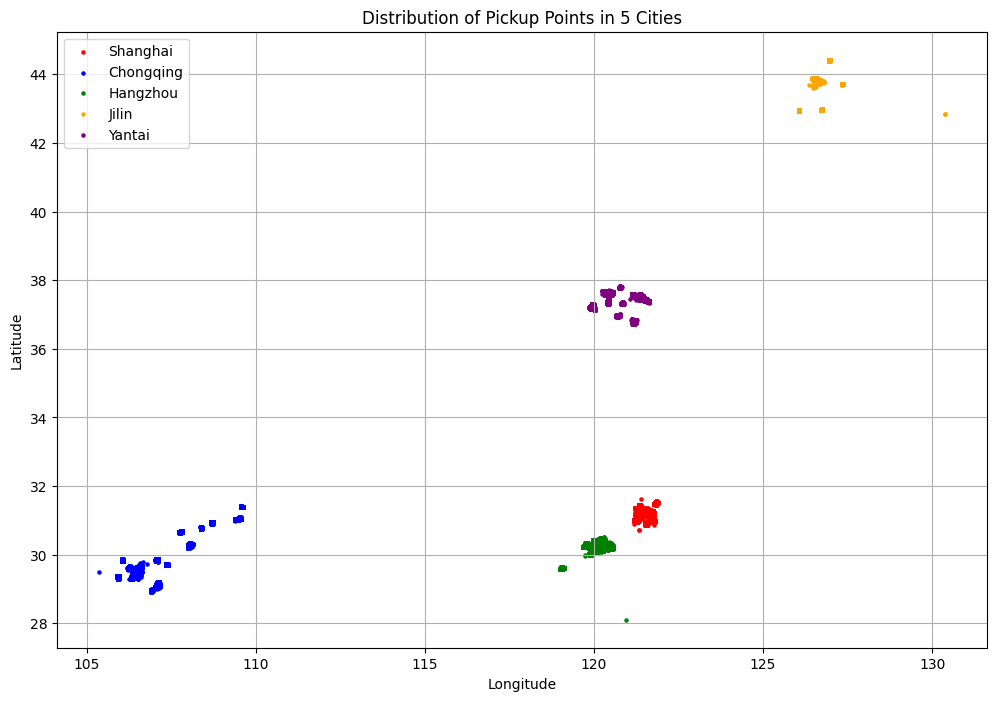

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# List of cities and corresponding colors
cities = ['Shanghai', 'Chongqing', 'Hangzhou', 'Jilin', 'Yantai']
colors = ['red', 'blue', 'green', 'orange', 'purple']

for city, color in zip(cities, colors):
    city_data = pickup[pickup['city'] == city]
    plt.scatter(city_data['lng'], city_data['lat'], s=5, alpha=1, label=city, color=color)
    del city_data

plt.title('Distribution of Pickup Points in 5 Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


Here's a scatter plot showing the distribution of pickup points in 5 cities:


Each point represents a pickup location.

The dense clusters indicate areas with a high concentration of pickup points, possibly commercial or densely populated areas.

Some sparse areas might indicate less populated or non-commercial areas.

From the plot, we can observe that the pickup points are spread across the city, but there are specific regions with a higher concentration of deliveries.

Next Steps:

Distribution of pickup Times:

We'll explore when most of the deliveries occur using histograms.

Distribution of Regions:

A bar plot to understand the frequency of deliveries across different regions.

Let's proceed with visualizing the distribution of pickup times.

In [4]:
# Extract the hour of pickup from the 'pickup_time' column
import seaborn as sns
pickup['pickup_hour'] = pd.to_datetime(pickup['pickup_time']).dt.hour

# Plot histogram of pickup hours
plt.figure(figsize=(12, 8))
sns.histplot(pickup['pickup_hour'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of pickup Hours in Shanghai')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deliveries')
plt.grid(True)
plt.show()


C:\Users\tariq\AppData\Local\Temp\ipykernel_15292\1298666992.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  delivery_shanghai['delivery_hour'] = pd.to_datetime(delivery_shanghai['delivery_time']).dt.hour


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 06-04 17:40:00, at position 0

It seems there's an issue with the 'delivery_time' column. The date format appears to be causing an "Out of bounds nanosecond timestamp" error. This likely means that there's an unconventional or inconsistent date format in the column.

To handle this, we'll first inspect the unique values in the 'pickup_time' column to identify the format and then process the data accordingly.

In [6]:
# Inspect unique values of 'pickup_time' column
unique_pickup_times = pickup['pickup_time'].unique()

unique_pickup_times[:20]  # Display the first 20 unique pickup times


array(['07-08 10:10:00', '07-21 10:10:00', '07-12 17:22:00',
       '07-09 15:54:00', '07-07 09:53:00', '07-19 09:47:00',
       '07-12 09:35:00', '07-28 14:53:00', '07-17 09:29:00',
       '07-25 11:02:00', '07-14 13:27:00', '07-28 10:01:00',
       '07-09 10:26:00', '07-12 10:44:00', '07-23 10:09:00',
       '05-30 11:02:00', '08-31 18:55:00', '10-05 16:53:00',
       '09-04 15:22:00', '09-08 16:02:00'], dtype=object)

It appears that the date format in the 'pickup_time' column is 'MM-DD HH:mm:ss', which is unconventional. The issue is likely due to the fact that the year is missing from the timestamp, and the default year (1900) might be causing the "Out of bounds" error.

To address this, I will:

Extract the hour from the 'pickup_time' string without converting it to a datetime object.
Plot a histogram of the pickup hours.
Let's proceed with this approach.

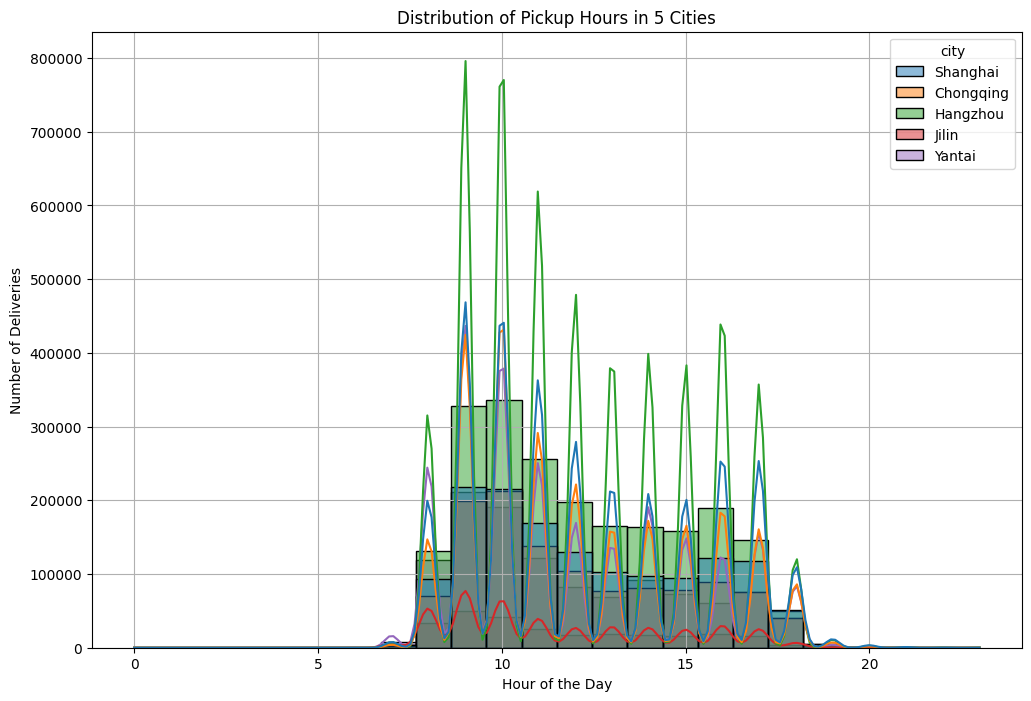

In [7]:
import seaborn as sns

# Extract the hour from the 'pickup_time' string
pickup['pickup_hour'] = pickup['pickup_time'].str.split(' ').str[1].str.split(':').str[0].astype(int)

# Plot histogram of pickup hours for all 5 cities
plt.figure(figsize=(12, 8))
sns.histplot(data=pickup, x='pickup_hour', hue='city', bins=24, kde=True, palette="tab10")
plt.title('Distribution of Pickup Hours in 5 Cities')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deliveries')
plt.grid(True)
plt.show()


In [11]:
# List of cities
cities = ['Shanghai', 'Chongqing', 'Hangzhou', 'Jilin', 'Yantai']
for i, city in enumerate(cities):
    city_data = pickup[pickup['city'] == city]
    print("city and size", city, city_data.shape[0])
    del city_data

city and size Shanghai 1424406
city and size Chongqing 1172703
city and size Hangzhou 2130456
city and size Jilin 261801
city and size Yantai 1146781


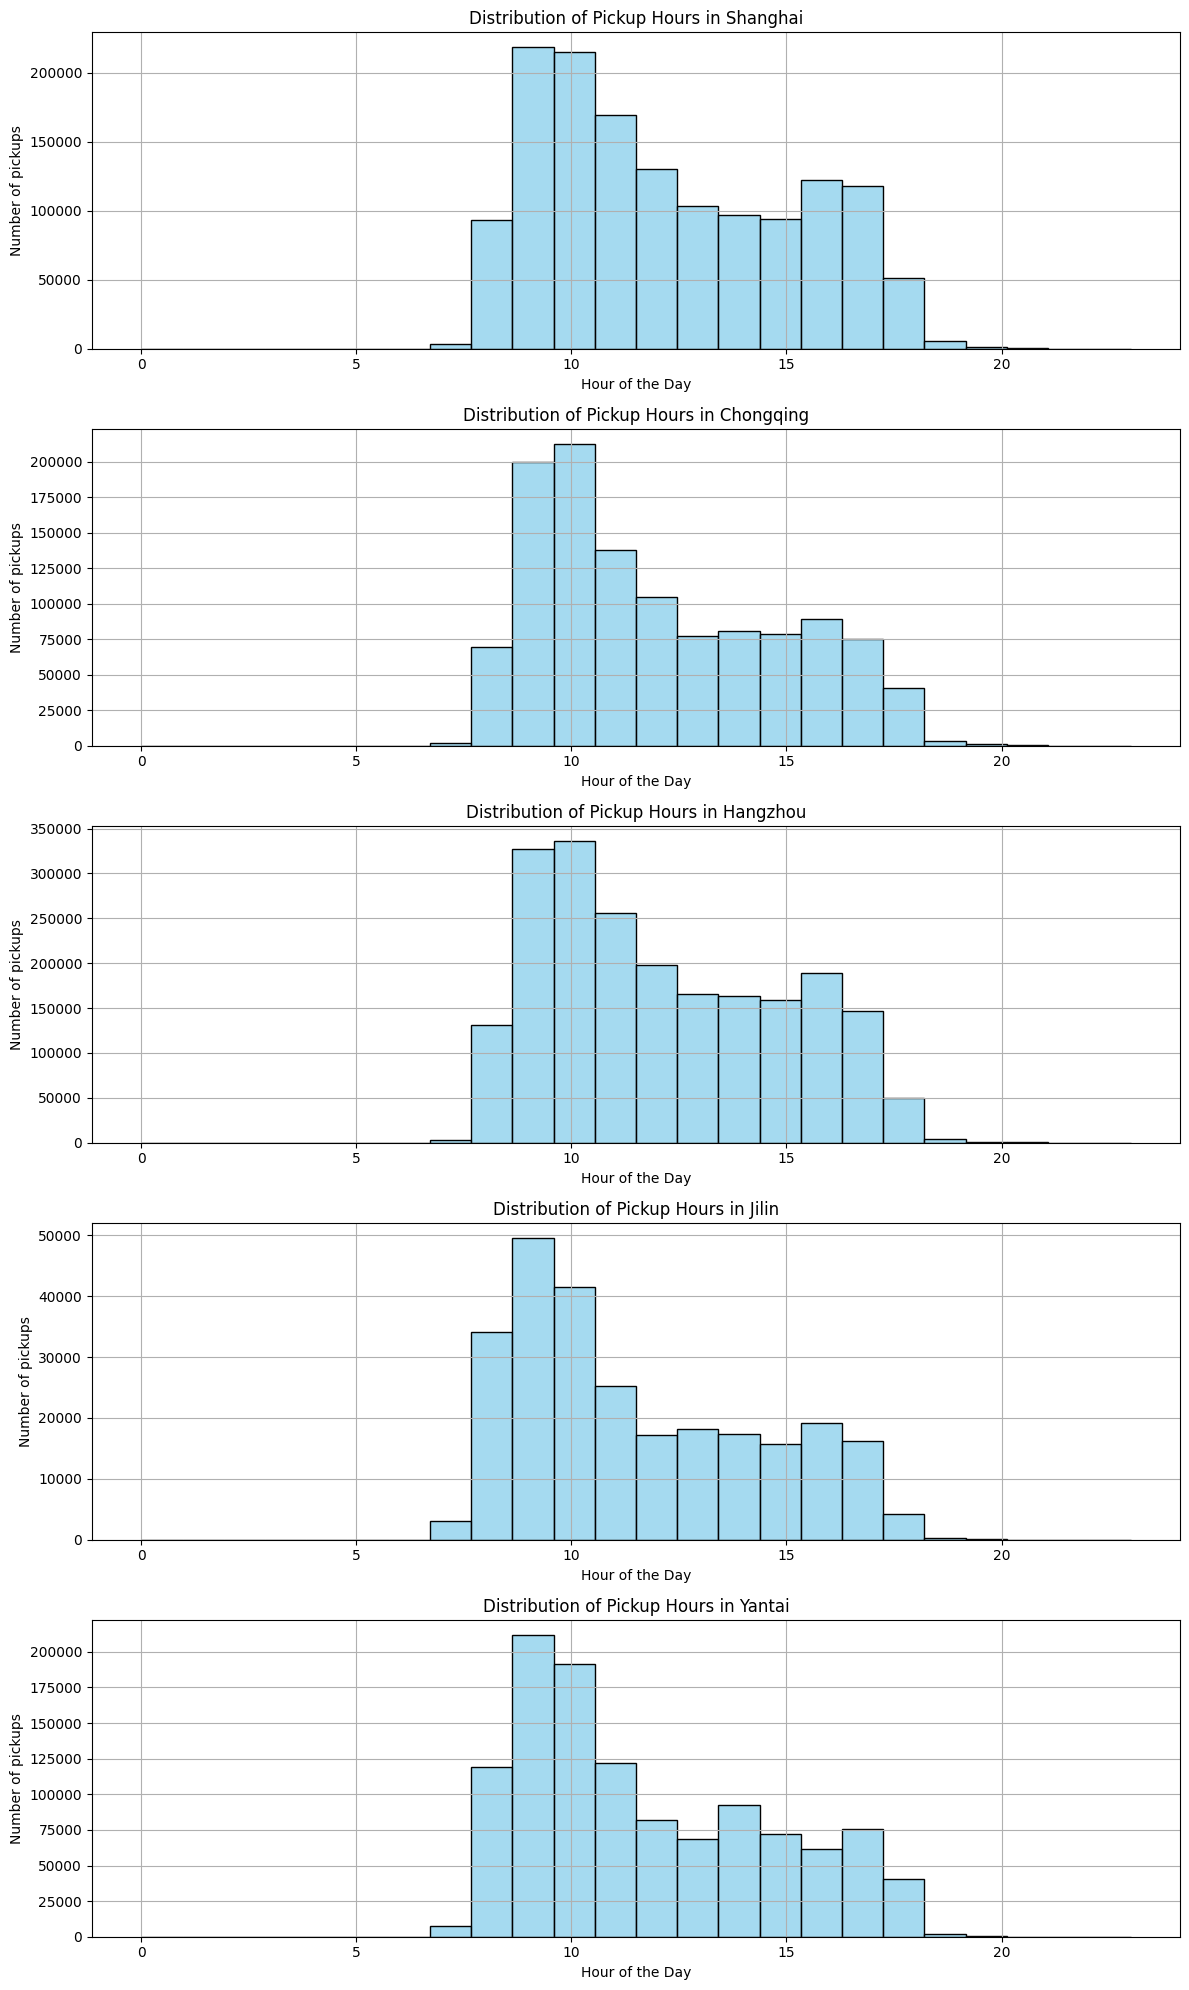

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the hour from the 'pickup_time' string
pickup['pickup_hour'] = pickup['pickup_time'].str.split(' ').str[1].str.split(':').str[0].astype(int)

# Create a 5x1 grid of subplots for the 5 cities
fig, axes = plt.subplots(5, 1, figsize=(12, 20))

# List of cities
cities = ['Shanghai', 'Chongqing', 'Hangzhou', 'Jilin', 'Yantai']

# Plot histogram of pickup hours for each city in its own subplot
for i, city in enumerate(cities):
    city_data = pickup[pickup['city'] == city]
    sns.histplot(data=city_data, x='pickup_hour', ax=axes[i], bins=24, kde=False, color='skyblue')
    axes[i].set_title(f'Distribution of Pickup Hours in {city}')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Number of pickups')
    axes[i].grid(True)
    del city_data

# Adjust the layout
plt.tight_layout()
plt.show()


In [13]:
pickup['pickup_hour'].unique()

array([10, 17, 15,  9, 14, 11, 13, 18, 16,  8, 12, 19,  6,  7, 20, 21, 23,
       22,  0,  5,  1,  2,  3,  4])

#### Shanghai data analysis

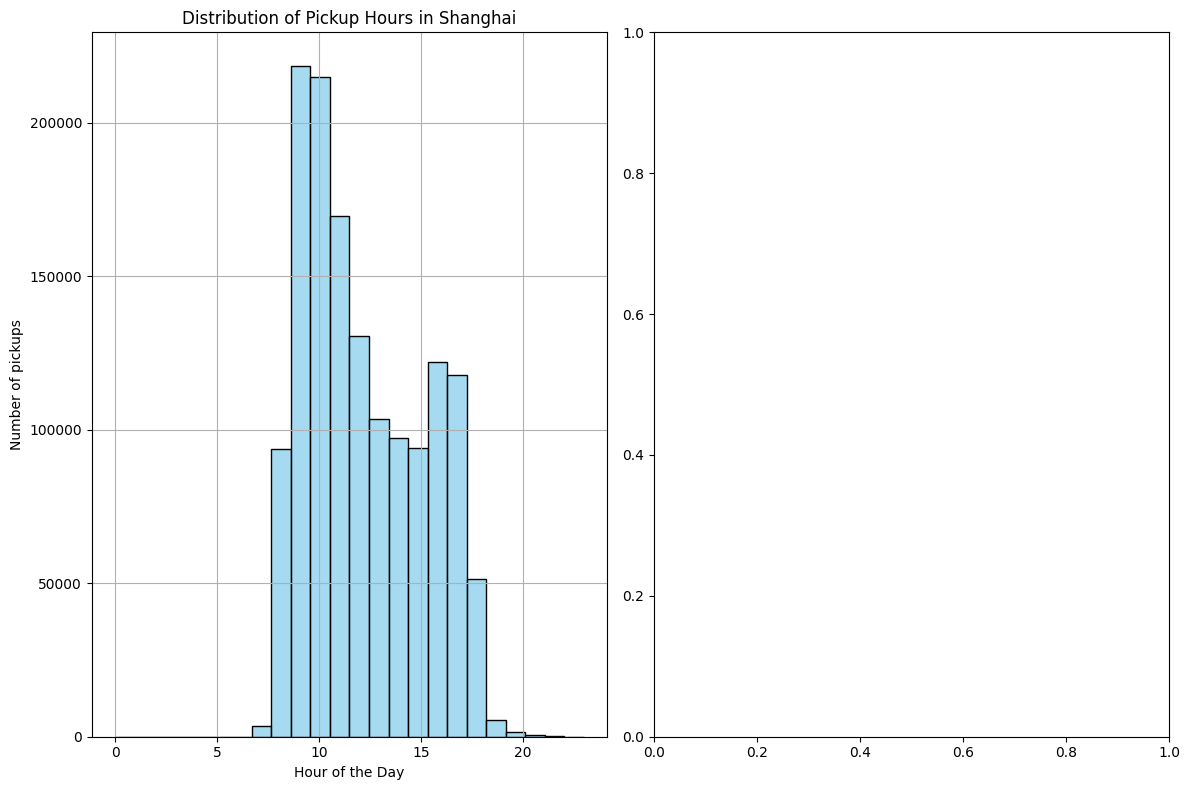

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the hour from the 'pickup_time' string
pickup['pickup_hour'] = pickup['pickup_time'].str.split(' ').str[1].str.split(':').str[0].astype(int)

# Create a 5x1 grid of subplots for the 5 cities
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# List of cities
cities = ['Shanghai']

# Plot histogram of pickup hours for each city in its own subplot
for i, city in enumerate(cities):
    city_data = pickup[pickup['city'] == city]
    sns.histplot(data=city_data, x='pickup_hour', ax=axes[i], bins=24, kde=False, color='skyblue')
    axes[i].set_title(f'Distribution of Pickup Hours in {city}')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Number of pickups')
    axes[i].grid(True)
    city_data

# Adjust the layout
plt.tight_layout()
plt.show()


In [18]:
city_data.shape

(1424406, 20)

In [19]:
city_data.courier_id.nunique()

4494

In [20]:
city_data['order_id'].nunique()

1424406

In [22]:
shanghai_data = city_data

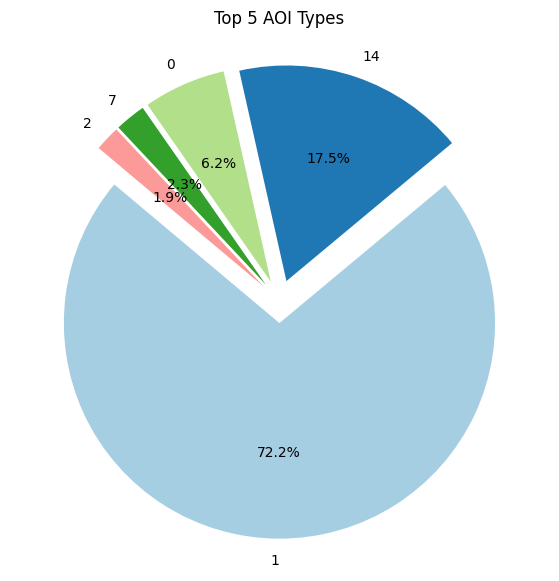

In [23]:
# Determine the frequency of each AOI type
aoi_counts = shanghai_data['aoi_type'].value_counts()

# Get the top 5 AOI types
top_aoi_counts = aoi_counts.head(5)

# Plot pie chart for the top 5 AOI types
plt.figure(figsize=(10, 7))
top_aoi_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=[0.1]*5)
plt.title('Top 5 AOI Types')
plt.ylabel('')
plt.show()


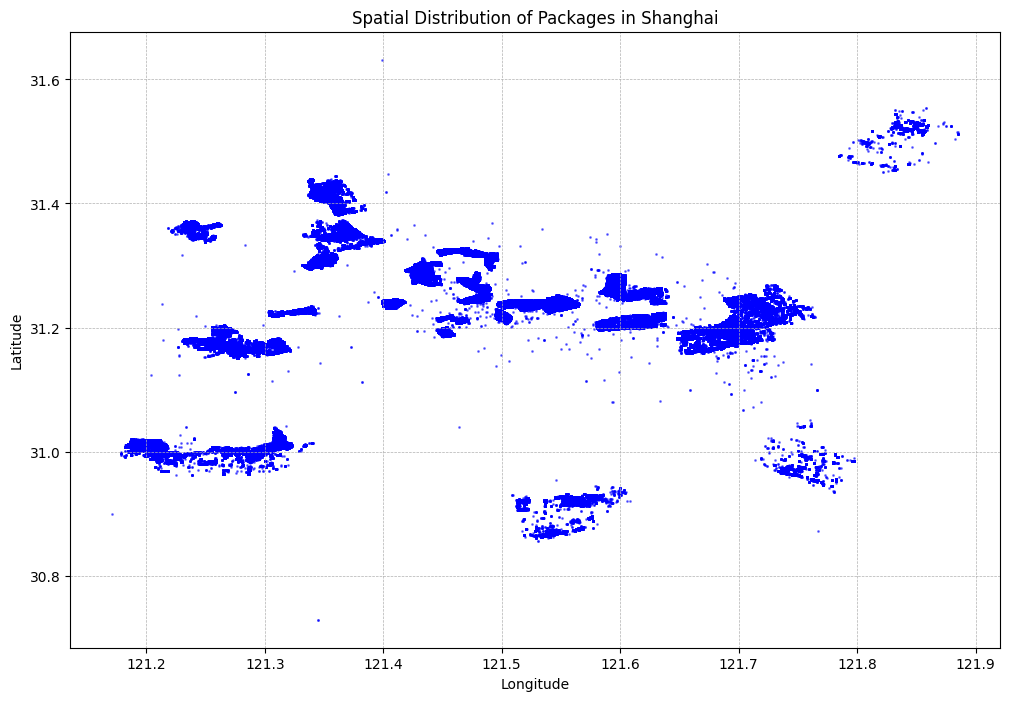

In [24]:
# Plot spatial distribution using the Lat and Lng columns
plt.figure(figsize=(12, 8))
plt.scatter(shanghai_data['lng'], shanghai_data['lat'], s=1, c='blue', alpha=0.5)
plt.title('Spatial Distribution of Packages in Shanghai')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


C:\Users\tariq\AppData\Local\Temp\ipykernel_31064\3536946956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_data['pickup_hour'] = shanghai_data['pickup_time'].str.slice(6, 8).astype(int)
C:\Users\tariq\AppData\Local\Temp\ipykernel_31064\3536946956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_data['pickup_minute'] = shanghai_data['pickup_time'].str.slice(9, 11).astype(int)
C:\Users\tariq\AppData\Local\Temp\ipykernel_31064\3536946956.py:4: SettingWithCopyWarning: 
A value is tryi

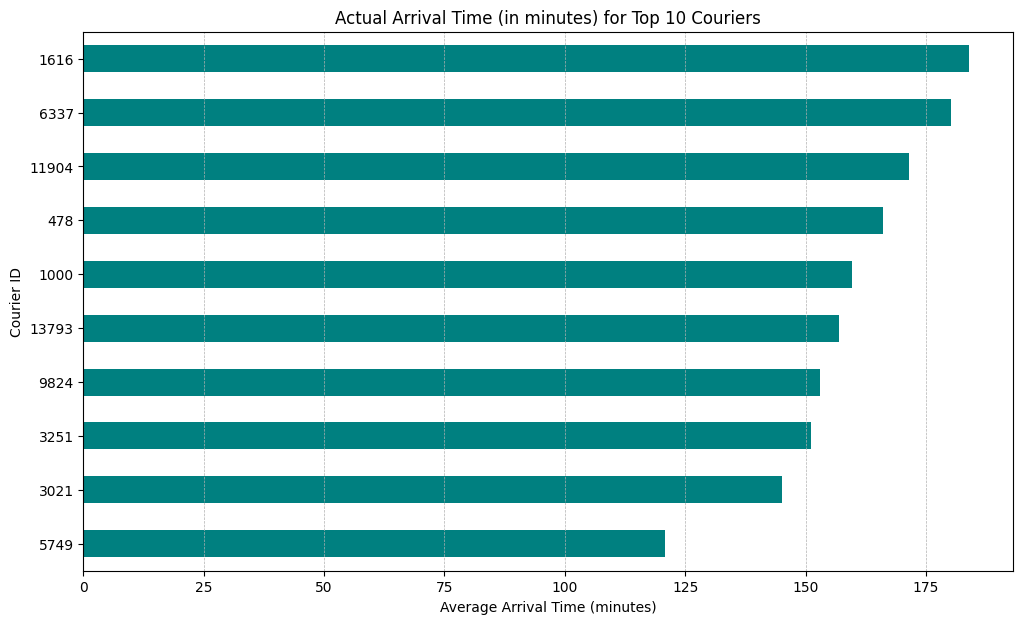

In [26]:
# Extract hour, minute, and day components from 'pickup_time' and 'accept_time'
shanghai_data['pickup_hour'] = shanghai_data['pickup_time'].str.slice(6, 8).astype(int)
shanghai_data['pickup_minute'] = shanghai_data['pickup_time'].str.slice(9, 11).astype(int)
shanghai_data['pickup_day'] = shanghai_data['pickup_time'].str.slice(0, 2).astype(int)

shanghai_data['accept_hour'] = shanghai_data['accept_time'].str.slice(6, 8).astype(int)
shanghai_data['accept_minute'] = shanghai_data['accept_time'].str.slice(9, 11).astype(int)
shanghai_data['accept_day'] = shanghai_data['accept_time'].str.slice(0, 2).astype(int)

# Calculate the actual arrival time in minutes for each order
shanghai_data['arrival_time_minutes'] = ((shanghai_data['pickup_day'] - shanghai_data['accept_day']) * 24 * 60 +
                                         (shanghai_data['pickup_hour'] - shanghai_data['accept_hour']) * 60 +
                                         shanghai_data['pickup_minute'] - shanghai_data['accept_minute'])

# Aggregate the actual arrival times for the top 10 couriers
top_couriers = shanghai_data['courier_id'].value_counts().head(10).index
top_courier_times = shanghai_data[shanghai_data['courier_id'].isin(top_couriers)].groupby('courier_id')['arrival_time_minutes'].mean()

# Plot the results
plt.figure(figsize=(12, 7))
top_courier_times.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Actual Arrival Time (in minutes) for Top 10 Couriers')
plt.xlabel('Average Arrival Time (minutes)')
plt.ylabel('Courier ID')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()


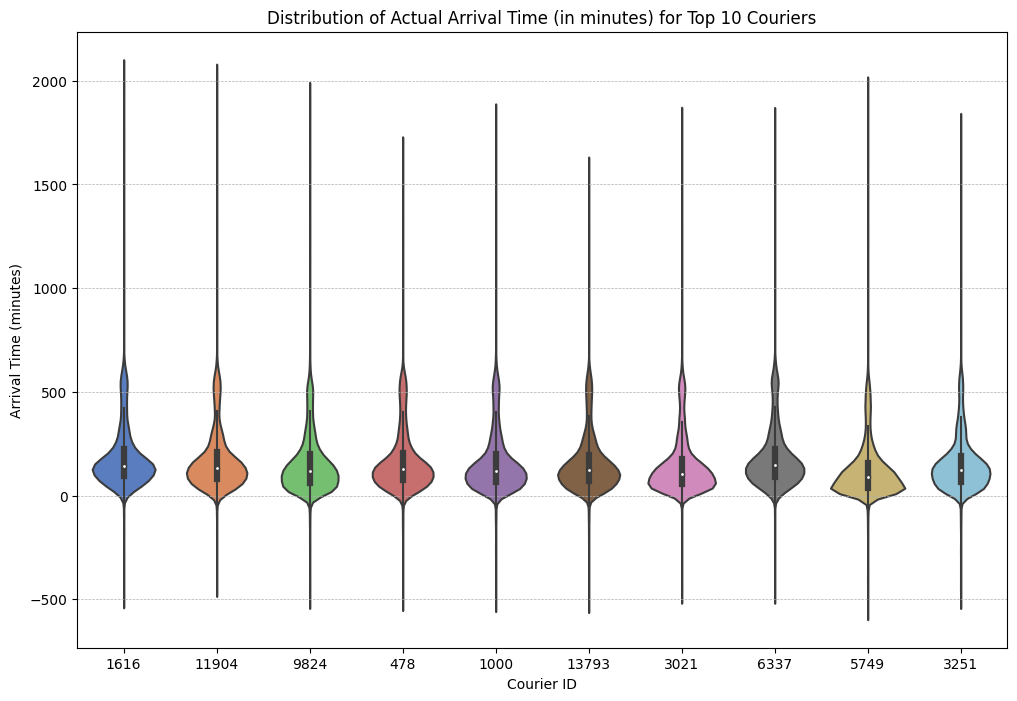

In [28]:
import seaborn as sns

# Filter data for the top 10 couriers
top_courier_data = shanghai_data[shanghai_data['courier_id'].isin(top_couriers)]

# Plot violin plot for the actual arrival times of the top 10 couriers
plt.figure(figsize=(12, 8))
sns.violinplot(x='courier_id', y='arrival_time_minutes', data=top_courier_data, palette="muted", order=top_couriers)
plt.title('Distribution of Actual Arrival Time (in minutes) for Top 10 Couriers')
plt.xlabel('Courier ID')
plt.ylabel('Arrival Time (minutes)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


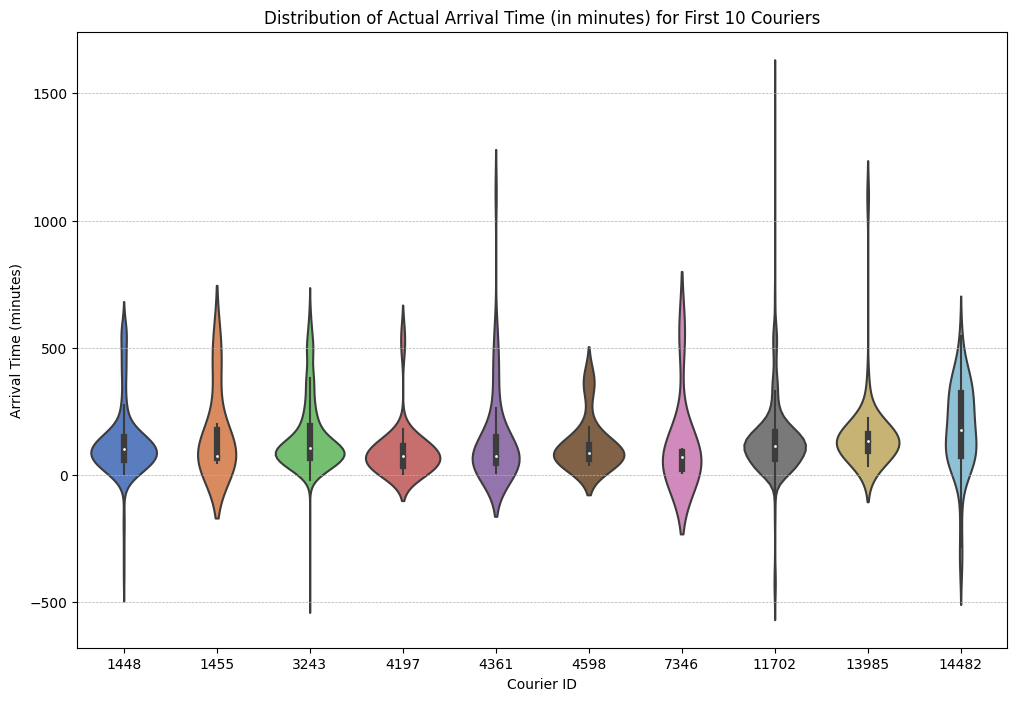

In [27]:
# Select the first 10 unique couriers from the dataset
first_10_couriers = shanghai_data['courier_id'].unique()[:10]

# Filter data for the first 10 couriers
first_10_courier_data = shanghai_data[shanghai_data['courier_id'].isin(first_10_couriers)]

# Plot violin plot for the actual arrival times of the first 10 couriers
plt.figure(figsize=(12, 8))
sns.violinplot(x='courier_id', y='arrival_time_minutes', data=first_10_courier_data, palette="muted", order=first_10_couriers)
plt.title('Distribution of Actual Arrival Time (in minutes) for First 10 Couriers')
plt.xlabel('Courier ID')
plt.ylabel('Arrival Time (minutes)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


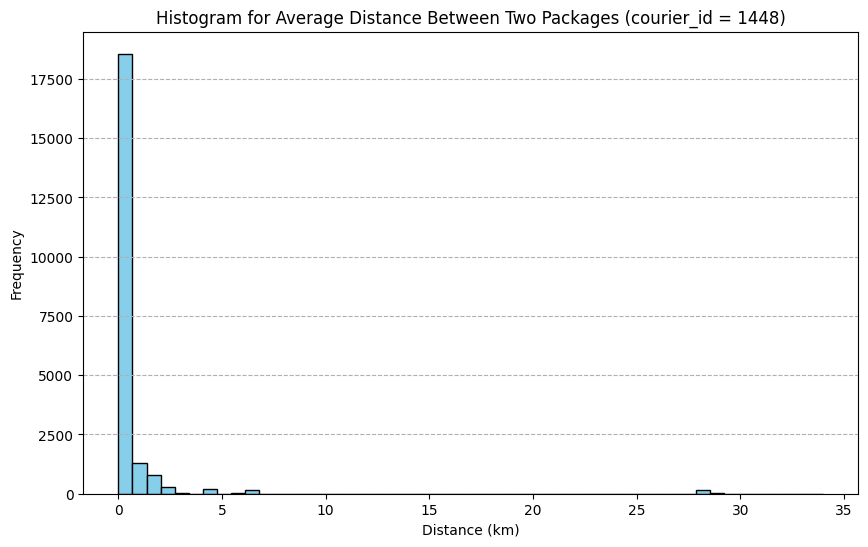

In [29]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance between two points on the earth in kilometers."""
    R = 6371.0  # Earth radius in kilometers

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Calculate pairwise distances for a subset of the data to manage computation time
# Filter the dataset for courier_id = 1448
subset_courier_1448 = shanghai_data[shanghai_data['courier_id'] == 1448]

distances_courier_1448 = []

# Calculate pairwise distances for the orders/packages associated with courier_id = 1448
for i in range(len(subset_courier_1448)):
    for j in range(i+1, len(subset_courier_1448)):
        lat1, lon1 = subset_courier_1448.iloc[i][['lat', 'lng']]
        lat2, lon2 = subset_courier_1448.iloc[j][['lat', 'lng']]
        distances_courier_1448.append(haversine_distance(lat1, lon1, lat2, lon2))

# Plot histogram for the average distance between packages for courier_id = 1448
plt.figure(figsize=(10, 6))
plt.hist(distances_courier_1448, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram for Average Distance Between Two Packages (courier_id = 1448)')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()



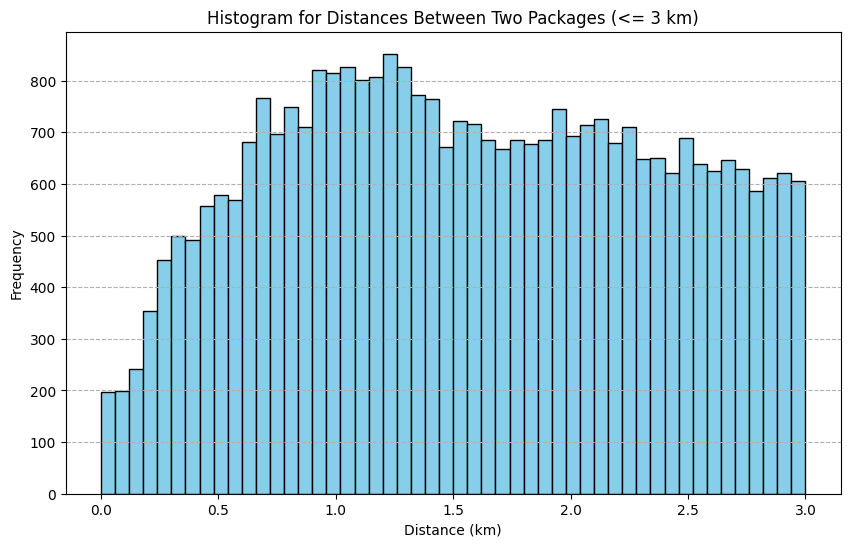

In [30]:
# Randomly sample a subset of the data for this calculation to manage computation time
subset_distance = shanghai_data.sample(n=1000, random_state=42)

distances_less_than_3km = []

# Calculate pairwise distances for the sampled subset and filter for distances <= 3 km
for i in range(len(subset_distance)):
    for j in range(i+1, len(subset_distance)):
        lat1, lon1 = subset_distance.iloc[i][['lat', 'lng']]
        lat2, lon2 = subset_distance.iloc[j][['lat', 'lng']]
        distance = haversine_distance(lat1, lon1, lat2, lon2)
        if distance <= 3:
            distances_less_than_3km.append(distance)

# Plot histogram for the distances <= 3 km
plt.figure(figsize=(10, 6))
plt.hist(distances_less_than_3km, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram for Distances Between Two Packages (<= 3 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()


Analysis:
Distribution of pickup Hours: From the histogram above, we can see that the most frequent pickup hours in Shanghai are from 9 AM to 7 PM, with a peak around 10 AM to 12 PM. The frequency of deliveries drops significantly after 8 PM and remains low until 8 AM.

Distribution of Regions:

We'll explore the distribution of deliveries across different regions to understand which regions have the highest demand.
Correlation Analysis:

We'll plot a heatmap to understand the relationships between numerical columns.
Geographical Distribution:

We'll explore the distribution of the starting (acceptance) and ending (pickup) points of each pickup.
Let's start with the Distribution of Regions using a bar plot to understand which regions in Shanghai have the highest number of deliveries.

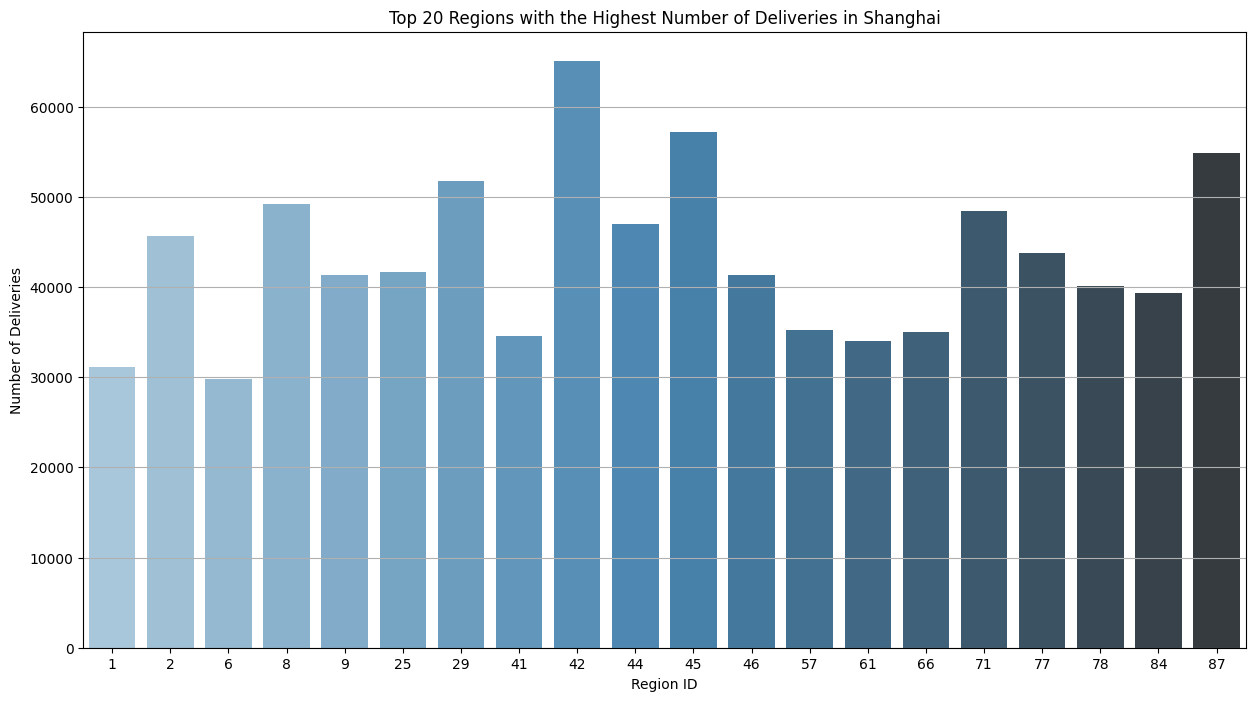

In [7]:
# Import required libraries again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset for parcel pickup in Shanghai
#pickup_shanghai = pd.read_csv('/mnt/data/pickup_sh.csv')

# Plot the distribution of deliveries across regions again
plt.figure(figsize=(15, 8))
region_counts = pickup_shanghai['region_id'].value_counts().head(20)  # Top 20 regions with the most deliveries
sns.barplot(x=region_counts.index, y=region_counts.values, palette="Blues_d")
plt.title('Top 20 Regions with the Highest Number of Deliveries in Shanghai')
plt.xlabel('Region ID')
plt.ylabel('Number of Deliveries')
plt.grid(axis='y')
plt.show()


Here's the visualization showing the distribution of deliveries across the top 20 regions in Shanghai:

The x-axis represents the Region IDs, and the y-axis represents the number of deliveries.
Some regions have significantly higher deliveries compared to others. This could be due to a variety of factors such as population density, commercial activity, or the presence of major landmarks or hubs.

Next Steps:
Correlation Analysis:

We'll plot a heatmap to understand the relationships between numerical columns.
Geographical Distribution:

We'll explore the distribution of the starting (acceptance) and ending (pickup) points of each pickup.
Let's start with the Correlation Analysis to understand how various numerical attributes relate to each other.